In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.figure_factory as ff

from tqdm import tqdm, trange

/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [2]:
data = pd.read_pickle('DataSet_Tesis.pkl')

In [3]:
#data = data[data['']>='']

In [4]:
data.head()

,SEMESTRE,COD_ESTUDIANTE,ESCUELA_PROFESIONAL,SITUACION_MATRICULA,CANT_CURSOS_APROBADOS,CANT_CURSOS_DESAPROBADOS,CANT_CURSOS_NSP,CANT_CRED_APROBADOS,CANT_CRED_DESAPROBADOS,CANT_CRED_NSP,...,PUNT_EXAMEN_ADMINISION,MODAL_INGRESO,COLEGIO_PROCEDENCIA,TIPO_COLEGIO,SEXO_ESTUDIANTE,EDAD_INGRESANTE,DISTRITO_NAC,PROVINCIA_NAC,DEPARTAMENTO_NACIMIENTO,NUM_INGRESOS_UNIVERSIDAD
0,2010-1,alumno1,TURISMO,1,6,0,1,19.0,0.0,3.0,...,0,CONCURSO ORDINARIO DE ADMISIÓN,...,...,M,NaN,...,...,...,1
1,2010-2,alumno1,TURISMO,1,4,0,1,13.0,0.0,3.0,...,0,CONCURSO ORDINARIO DE ADMISIÓN,...,...,M,NaN,...,...,...,1
2,2010-C,alumno1,TURISMO,1,2,0,0,6.0,0.0,0.0,...,0,CONCURSO ORDINARIO DE ADMISIÓN,...,...,M,NaN,...,...,...,1
3,2011-1,alumno1,TURISMO,0,0,0,0,0.0,0.0,0.0,...,0,CONCURSO ORDINARIO DE ADMISIÓN,...,...,M,NaN,...,...,...,1
4,2011-2,alumno1,TURISMO,0,0,0,0,0.0,0.0,0.0,...,0,CONCURSO ORDINARIO DE ADMISIÓN,...,...,M,NaN,...,...,...,1


In [5]:
data[['EDAD_ANIO_ESTUDIO',
       'SITUACION_DESERCION_AL_SEM', 'PLAN_ESTUDIOS_INGRESO',
       'PLAN_ESTUDIOS_ACTUAL', 'CANTIDAD_ASIGN_MATRICULADOS',
       'CANTIDAD_CRED_ACUMULADOS', 'MONTO_PENSION', 'MATRICULA_EXTEMPORANEO',
       'CANT_ASIG_CONVALIDADOS', 'CANT_CRED_CONVALIDADOS',
       'PUNT_EXAMEN_ADMINISION', 'MODAL_INGRESO', 'COLEGIO_PROCEDENCIA',
       'TIPO_COLEGIO', 'SEXO_ESTUDIANTE', 'EDAD_INGRESANTE', 'DISTRITO_NAC',
       'PROVINCIA_NAC', 'DEPARTAMENTO_NACIMIENTO', 'NUM_INGRESOS_UNIVERSIDAD']].head()

,EDAD_ANIO_ESTUDIO,SITUACION_DESERCION_AL_SEM,PLAN_ESTUDIOS_INGRESO,PLAN_ESTUDIOS_ACTUAL,CANTIDAD_ASIGN_MATRICULADOS,CANTIDAD_CRED_ACUMULADOS,MONTO_PENSION,MATRICULA_EXTEMPORANEO,CANT_ASIG_CONVALIDADOS,CANT_CRED_CONVALIDADOS,PUNT_EXAMEN_ADMINISION,MODAL_INGRESO,COLEGIO_PROCEDENCIA,TIPO_COLEGIO,SEXO_ESTUDIANTE,EDAD_INGRESANTE,DISTRITO_NAC,PROVINCIA_NAC,DEPARTAMENTO_NACIMIENTO,NUM_INGRESOS_UNIVERSIDAD
0,0,0,PLAN 1998,PLAN 2005,22,193.0,292.0,0,0,0,0,CONCURSO ORDINARIO DE ADMISIÓN,...,...,M,NaN,...,...,...,1
1,0,0,PLAN 1998,PLAN 2005,16,206.0,292.0,0,0,0,0,CONCURSO ORDINARIO DE ADMISIÓN,...,...,M,NaN,...,...,...,1
2,0,0,PLAN 1998,PLAN 2005,6,212.0,175.2,0,0,0,0,CONCURSO ORDINARIO DE ADMISIÓN,...,...,M,NaN,...,...,...,1
3,0,1,PLAN 1998,PLAN 2005,0,212.0,70.1,0,0,0,0,CONCURSO ORDINARIO DE ADMISIÓN,...,...,M,NaN,...,...,...,1
4,0,1,PLAN 1998,PLAN 2005,0,212.0,0.0,0,0,0,0,CONCURSO ORDINARIO DE ADMISIÓN,...,...,M,NaN,...,...,...,1


In [6]:
set(data['PLAN_ESTUDIOS_ACTUAL'])

{'MOVILIDAD EST.',
 'NIV. 2016',
 'PLAN 1980',
 'PLAN 1993',
 'PLAN 1994',
 'PLAN 1997',
 'PLAN 1998',
 'PLAN 1999',
 'PLAN 2000 (IP)',
 'PLAN 2001',
 'PLAN 2003',
 'PLAN 2005',
 'PLAN 2005 (IP)',
 'PLAN 2005 (LL)',
 'PLAN 2005 (MA)',
 'PLAN 2006',
 'PLAN 2010',
 'PLAN 2013',
 'PLAN 2013 (IP)',
 'PLAN 2014',
 'PLAN 2015',
 'PLAN 2016',
 'PLAN 2017 (IP)',
 'PLAN 2020'}

In [7]:
data.columns

Index(['SEMESTRE', 'COD_ESTUDIANTE', 'ESCUELA_PROFESIONAL',
       'SITUACION_MATRICULA', 'CANT_CURSOS_APROBADOS',
       'CANT_CURSOS_DESAPROBADOS', 'CANT_CURSOS_NSP', 'CANT_CRED_APROBADOS',
       'CANT_CRED_DESAPROBADOS', 'CANT_CRED_NSP', 'PROM_SIN_NSP',
       'CRED_OBLIG_MAT', 'CRED_ELEC_MAT', 'CANT_CURSO_MAT_CICLO_01',
       'CANT_CURSO_MAT_CICLO_02', 'CANT_CURSO_MAT_CICLO_03',
       'CANT_CURSO_MAT_CICLO_04', 'CANT_CURSO_MAT_CICLO_05',
       'CANT_CURSO_MAT_CICLO_06', 'CANT_CURSO_MAT_CICLO_07',
       'CANT_CURSO_MAT_CICLO_08', 'CANT_CURSO_MAT_CICLO_09',
       'CANT_CURSO_MAT_CICLO_10', 'CANT_CURSO_MAT_CICLO_11',
       'CANT_CURSO_MAT_CICLO_12', 'CANT_CURSO_MAT_CICLO_13',
       'CANT_CURSO_MAT_CICLO_14', 'CANT_CRED_MAT_CICLO_01',
       'CANT_CRED_MAT_CICLO_02', 'CANT_CRED_MAT_CICLO_03',
       'CANT_CRED_MAT_CICLO_04', 'CANT_CRED_MAT_CICLO_05',
       'CANT_CRED_MAT_CICLO_06', 'CANT_CRED_MAT_CICLO_07',
       'CANT_CRED_MAT_CICLO_08', 'CANT_CRED_MAT_CICLO_09',
       'CAN

In [8]:
data_alumno = data[['SEMESTRE', 'COD_ESTUDIANTE', 'ESCUELA_PROFESIONAL',
       'SITUACION_MATRICULA', 'CANT_CURSOS_APROBADOS',
       'CANT_CURSOS_DESAPROBADOS', 'CANT_CURSOS_NSP', 'CANT_CRED_APROBADOS',
       'CANT_CRED_DESAPROBADOS', 'CANT_CRED_NSP', 'PROM_SIN_NSP',
       'CRED_OBLIG_MAT', 'CRED_ELEC_MAT',
                    'CANT_CURSO_MAT_CICLO_01',
                    'CANT_CRED_MAT_CICLO_01',
                    'CANT_CURSO_MAT_DES_CICLO_01',
                    'CANT_CRED_MAT_DES_CICLO_01',
       'PORC_ASISTENCIA', 'EDAD_ANIO_ESTUDIO',
       'SITUACION_DESERCION_AL_SEM', 'PLAN_ESTUDIOS_INGRESO',
       'PLAN_ESTUDIOS_ACTUAL', 'CANTIDAD_ASIGN_MATRICULADOS',
       'CANTIDAD_CRED_ACUMULADOS', 'MONTO_PENSION', 'MATRICULA_EXTEMPORANEO',
       'CANT_ASIG_CONVALIDADOS', 'CANT_CRED_CONVALIDADOS',
       'PUNT_EXAMEN_ADMINISION', 'MODAL_INGRESO', 'COLEGIO_PROCEDENCIA',
       'TIPO_COLEGIO', 'SEXO_ESTUDIANTE', 'EDAD_INGRESANTE', 'DISTRITO_NAC',
       'PROVINCIA_NAC', 'DEPARTAMENTO_NACIMIENTO', 'NUM_INGRESOS_UNIVERSIDAD']]


In [9]:
data_alumno[data_alumno['COD_ESTUDIANTE']=='alumno100'].head()

,SEMESTRE,COD_ESTUDIANTE,ESCUELA_PROFESIONAL,SITUACION_MATRICULA,CANT_CURSOS_APROBADOS,CANT_CURSOS_DESAPROBADOS,CANT_CURSOS_NSP,CANT_CRED_APROBADOS,CANT_CRED_DESAPROBADOS,CANT_CRED_NSP,...,PUNT_EXAMEN_ADMINISION,MODAL_INGRESO,COLEGIO_PROCEDENCIA,TIPO_COLEGIO,SEXO_ESTUDIANTE,EDAD_INGRESANTE,DISTRITO_NAC,PROVINCIA_NAC,DEPARTAMENTO_NACIMIENTO,NUM_INGRESOS_UNIVERSIDAD
2700,2010-1,alumno100,CONTABILIDAD,0,0,0,0,0.0,0.0,0.0,...,0,CONCURSO ORDINARIO DE ADMISIÓN,...,...,F,NaN,...,...,...,1
2701,2010-2,alumno100,CONTABILIDAD,0,0,0,0,0.0,0.0,0.0,...,0,CONCURSO ORDINARIO DE ADMISIÓN,...,...,F,NaN,...,...,...,1
2702,2010-C,alumno100,CONTABILIDAD,0,0,0,0,0.0,0.0,0.0,...,0,CONCURSO ORDINARIO DE ADMISIÓN,...,...,F,NaN,...,...,...,1
2703,2011-1,alumno100,CONTABILIDAD,0,0,0,0,0.0,0.0,0.0,...,0,CONCURSO ORDINARIO DE ADMISIÓN,...,...,F,NaN,...,...,...,1
2704,2011-2,alumno100,CONTABILIDAD,1,2,0,0,7.0,0.0,0.0,...,0,CONCURSO ORDINARIO DE ADMISIÓN,...,...,F,NaN,...,...,...,1


### Cursos Aprobados

In [10]:
# CURSOS
aprobados_df = data[data['SITUACION_MATRICULA']==1]
#aprobados_df = data[data['SITUACION_MATRICULA']!=5]
aprobados_df = aprobados_df[['SEMESTRE',# 'ESCUELA_PROFESIONAL', 
                             'COD_ESTUDIANTE',
                             'CANT_CURSO_MAT_CICLO_01', 'CANT_CURSO_MAT_CICLO_02', 'CANT_CURSO_MAT_CICLO_03',
                             'CANT_CURSO_MAT_CICLO_04', 'CANT_CURSO_MAT_CICLO_05', 'CANT_CURSO_MAT_CICLO_06',
                             'CANT_CURSO_MAT_CICLO_07', 'CANT_CURSO_MAT_CICLO_08', 'CANT_CURSO_MAT_CICLO_09',
                             'CANT_CURSO_MAT_CICLO_10', 'CANT_CURSO_MAT_CICLO_11', 'CANT_CURSO_MAT_CICLO_12',
                             'CANT_CURSO_MAT_CICLO_13', 'CANT_CURSO_MAT_CICLO_14'
                            ]]
aprobados_df = aprobados_df.reset_index(drop=True)
aprobados_df.head()

,SEMESTRE,COD_ESTUDIANTE,CANT_CURSO_MAT_CICLO_01,CANT_CURSO_MAT_CICLO_02,CANT_CURSO_MAT_CICLO_03,CANT_CURSO_MAT_CICLO_04,CANT_CURSO_MAT_CICLO_05,CANT_CURSO_MAT_CICLO_06,CANT_CURSO_MAT_CICLO_07,CANT_CURSO_MAT_CICLO_08,CANT_CURSO_MAT_CICLO_09,CANT_CURSO_MAT_CICLO_10,CANT_CURSO_MAT_CICLO_11,CANT_CURSO_MAT_CICLO_12,CANT_CURSO_MAT_CICLO_13,CANT_CURSO_MAT_CICLO_14
0,2010-1,alumno1,0,0,0,0,0,0,1,0,5,1,0,0,0,0
1,2010-2,alumno1,0,0,0,0,0,0,0,0,1,4,0,0,0,0
2,2010-C,alumno1,0,0,0,0,0,0,0,0,0,2,0,0,0,0
3,2010-2,alumno2,0,0,1,0,0,3,0,0,0,0,0,0,0,0
4,2011-1,alumno2,0,1,1,0,0,2,0,0,0,0,0,0,0,0


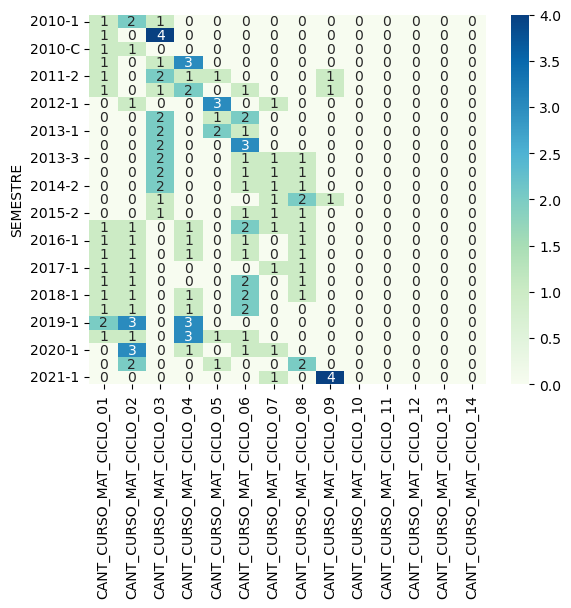

In [11]:
abc = aprobados_df[aprobados_df['COD_ESTUDIANTE']=='alumno10615'].reset_index(drop=True)
del abc['COD_ESTUDIANTE']
# del abc['ESCUELA_PROFESIONAL']
abc = abc.set_index('SEMESTRE')

ax = sns.heatmap(abc, annot=True, cmap = 'GnBu')

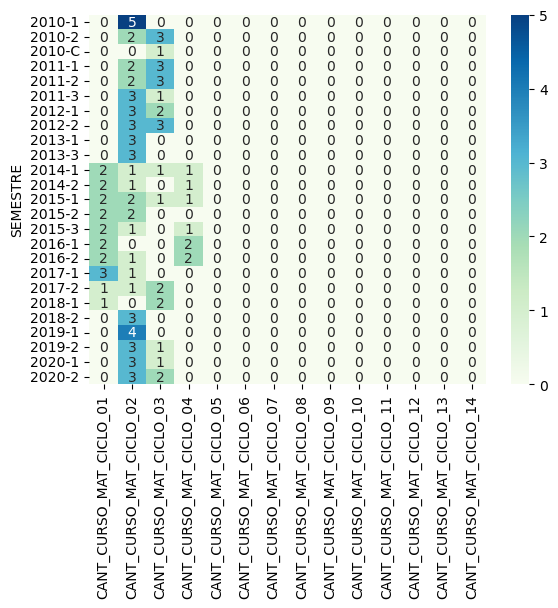

In [12]:
abc = aprobados_df[aprobados_df['COD_ESTUDIANTE']=='alumno2740'].reset_index(drop=True)
del abc['COD_ESTUDIANTE']
# del abc['ESCUELA_PROFESIONAL']
abc = abc.set_index('SEMESTRE')

ax = sns.heatmap(abc, annot=True, cmap = 'GnBu')

In [13]:
data_temp = aprobados_df.groupby(['COD_ESTUDIANTE'
                                 ]).agg(NUM_MATRICULAS=('SEMESTRE','count'))
data_temp = data_temp.reset_index()

In [14]:
data_temp.sort_values(by=['NUM_MATRICULAS'], ascending=False).head(34)

,COD_ESTUDIANTE,NUM_MATRICULAS
676,alumno10615,27
46482,alumno9926,27
42927,alumno6652,27
43515,alumno7192,27
45984,alumno9462,27
43577,alumno7248,27
25090,alumno3552,27
10201,alumno2028,27
10677,alumno2077,27
44030,alumno7668,27


In [15]:
list_alumnos = list(set(data_temp['COD_ESTUDIANTE']))[:1]
for alumno in list_alumnos:
    print(alumno)
    temp_df = aprobados_df[aprobados_df['COD_ESTUDIANTE']==alumno].reset_index(drop=True)

alumno38589


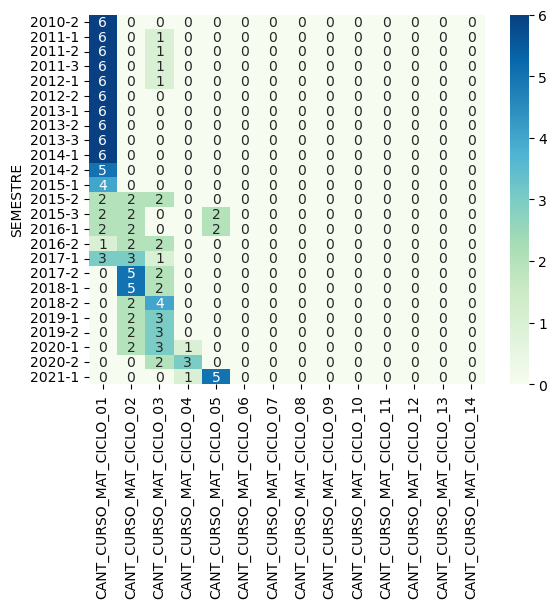

In [16]:
abc = aprobados_df[aprobados_df['COD_ESTUDIANTE']=='alumno11496'].reset_index(drop=True)
del abc['COD_ESTUDIANTE']
#del abc['ESCUELA_PROFESIONAL']
abc = abc.set_index('SEMESTRE')

ax = sns.heatmap(abc, annot=True, cmap = 'GnBu')

In [17]:
temp_df

,SEMESTRE,COD_ESTUDIANTE,CANT_CURSO_MAT_CICLO_01,CANT_CURSO_MAT_CICLO_02,CANT_CURSO_MAT_CICLO_03,CANT_CURSO_MAT_CICLO_04,CANT_CURSO_MAT_CICLO_05,CANT_CURSO_MAT_CICLO_06,CANT_CURSO_MAT_CICLO_07,CANT_CURSO_MAT_CICLO_08,CANT_CURSO_MAT_CICLO_09,CANT_CURSO_MAT_CICLO_10,CANT_CURSO_MAT_CICLO_11,CANT_CURSO_MAT_CICLO_12,CANT_CURSO_MAT_CICLO_13,CANT_CURSO_MAT_CICLO_14
0,2017-2,alumno38589,1,8,0,0,0,0,0,0,0,0,0,0,0,0
1,2018-1,alumno38589,0,1,5,0,0,0,0,0,0,0,0,0,0,0
2,2018-2,alumno38589,0,0,3,2,0,0,0,0,0,0,0,0,0,0
3,2019-1,alumno38589,0,0,1,2,2,0,0,0,0,0,0,0,0,0
4,2019-2,alumno38589,0,0,0,2,3,0,0,0,0,0,0,0,0,0
5,2020-1,alumno38589,0,0,0,1,4,0,0,0,0,0,0,0,0,0
6,2020-2,alumno38589,0,0,0,1,2,1,0,0,0,0,0,0,0,0
7,2021-1,alumno38589,0,0,0,1,1,2,0,0,0,0,0,0,0,0


In [18]:
#X

In [19]:
aprobados_df.groupby(['COD_ESTUDIANTE' ]).agg(
    NUM_MATRICULAS=('SEMESTRE','count'),
    NUM_CURSOS_CICLO_01=('CANT_CURSO_MAT_CICLO_01','sum'),
    NUM_CURSOS_CICLO_02=('CANT_CURSO_MAT_CICLO_02','sum'),
    NUM_CURSOS_CICLO_03=('CANT_CURSO_MAT_CICLO_03','sum'),
    NUM_CURSOS_CICLO_04=('CANT_CURSO_MAT_CICLO_04','sum'),
    NUM_CURSOS_CICLO_05=('CANT_CURSO_MAT_CICLO_05','sum'),
    NUM_CURSOS_CICLO_06=('CANT_CURSO_MAT_CICLO_06','sum'),
    NUM_CURSOS_CICLO_07=('CANT_CURSO_MAT_CICLO_07','sum'),
    NUM_CURSOS_CICLO_08=('CANT_CURSO_MAT_CICLO_08','sum'),
    NUM_CURSOS_CICLO_09=('CANT_CURSO_MAT_CICLO_09','sum'),
    NUM_CURSOS_CICLO_10=('CANT_CURSO_MAT_CICLO_10','sum'),
    NUM_CURSOS_CICLO_11=('CANT_CURSO_MAT_CICLO_11','sum'),
    NUM_CURSOS_CICLO_12=('CANT_CURSO_MAT_CICLO_12','sum'),
    NUM_CURSOS_CICLO_13=('CANT_CURSO_MAT_CICLO_13','sum'),
    NUM_CURSOS_CICLO_14=('CANT_CURSO_MAT_CICLO_14','sum'),
).sort_values(by=['NUM_CURSOS_CICLO_01'], ascending=False).head(34)

,NUM_MATRICULAS,NUM_CURSOS_CICLO_01,NUM_CURSOS_CICLO_02,NUM_CURSOS_CICLO_03,NUM_CURSOS_CICLO_04,NUM_CURSOS_CICLO_05,NUM_CURSOS_CICLO_06,NUM_CURSOS_CICLO_07,NUM_CURSOS_CICLO_08,NUM_CURSOS_CICLO_09,NUM_CURSOS_CICLO_10,NUM_CURSOS_CICLO_11,NUM_CURSOS_CICLO_12,NUM_CURSOS_CICLO_13,NUM_CURSOS_CICLO_14
COD_ESTUDIANTE,,,,,,,,,,,,,,,
alumno15171,17,94,9,6,4,0,0,0,0,0,0,0,0,0,0
alumno8766,13,91,0,0,0,0,0,0,0,0,0,0,0,0,0
alumno24173,16,89,9,3,0,0,0,0,0,0,0,0,0,0,0
alumno1498,24,87,13,9,6,9,4,4,5,1,1,0,0,0,0
alumno16896,20,84,29,18,1,0,0,0,0,0,0,0,0,0,0
alumno7692,21,81,26,3,0,0,0,0,0,0,0,0,0,0,0
alumno21704,18,80,16,11,4,3,1,0,0,0,0,0,0,0,0
alumno11496,25,79,29,28,5,9,0,0,0,0,0,0,0,0,0
alumno28583,13,79,7,7,0,0,0,0,0,0,0,0,0,0,0


# MODELO

In [20]:
from sklearn.cluster import KMeans
import numpy as np

from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

## FILTRANDO CURSOS APROBADO Y DESAPROBADOS

In [21]:
# CURSOS
df_historial = data[data['SITUACION_MATRICULA']==1]
df_historial = df_historial[['SEMESTRE',# 'ESCUELA_PROFESIONAL', 
                             'COD_ESTUDIANTE',
                             'CANT_CURSO_MAT_CICLO_01', 'CANT_CURSO_MAT_CICLO_02', 'CANT_CURSO_MAT_CICLO_03',
                             'CANT_CURSO_MAT_CICLO_04', 'CANT_CURSO_MAT_CICLO_05', 'CANT_CURSO_MAT_CICLO_06',
                             'CANT_CURSO_MAT_CICLO_07', 'CANT_CURSO_MAT_CICLO_08', 'CANT_CURSO_MAT_CICLO_09',
                             'CANT_CURSO_MAT_CICLO_10', 'CANT_CURSO_MAT_CICLO_11', 'CANT_CURSO_MAT_CICLO_12',
                             'CANT_CURSO_MAT_CICLO_13', 'CANT_CURSO_MAT_CICLO_14',
                             'CANT_CURSO_MAT_DES_CICLO_01', 'CANT_CURSO_MAT_DES_CICLO_02', 'CANT_CURSO_MAT_DES_CICLO_03',
                             'CANT_CURSO_MAT_DES_CICLO_04', 'CANT_CURSO_MAT_DES_CICLO_05', 'CANT_CURSO_MAT_DES_CICLO_06',
                             'CANT_CURSO_MAT_DES_CICLO_07', 'CANT_CURSO_MAT_DES_CICLO_08', 'CANT_CURSO_MAT_DES_CICLO_09',
                             'CANT_CURSO_MAT_DES_CICLO_10', 'CANT_CURSO_MAT_DES_CICLO_11', 'CANT_CURSO_MAT_DES_CICLO_12',
                             'CANT_CURSO_MAT_DES_CICLO_13', 'CANT_CURSO_MAT_DES_CICLO_14'
                            ]]
df_historial = df_historial.reset_index(drop=True)
df_historial.head()

,SEMESTRE,COD_ESTUDIANTE,CANT_CURSO_MAT_CICLO_01,CANT_CURSO_MAT_CICLO_02,CANT_CURSO_MAT_CICLO_03,CANT_CURSO_MAT_CICLO_04,CANT_CURSO_MAT_CICLO_05,CANT_CURSO_MAT_CICLO_06,CANT_CURSO_MAT_CICLO_07,CANT_CURSO_MAT_CICLO_08,...,CANT_CURSO_MAT_DES_CICLO_05,CANT_CURSO_MAT_DES_CICLO_06,CANT_CURSO_MAT_DES_CICLO_07,CANT_CURSO_MAT_DES_CICLO_08,CANT_CURSO_MAT_DES_CICLO_09,CANT_CURSO_MAT_DES_CICLO_10,CANT_CURSO_MAT_DES_CICLO_11,CANT_CURSO_MAT_DES_CICLO_12,CANT_CURSO_MAT_DES_CICLO_13,CANT_CURSO_MAT_DES_CICLO_14
0,2010-1,alumno1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,2010-2,alumno1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2010-C,alumno1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010-2,alumno2,0,0,1,0,0,3,0,0,...,0,3,0,0,0,0,0,0,0,0
4,2011-1,alumno2,0,1,1,0,0,2,0,0,...,0,2,0,0,0,0,0,0,0,0


In [22]:
X = df_historial.groupby(['COD_ESTUDIANTE' ]).agg(
        #NUM_MATRICULAS=('SEMESTRE','count'),
        NUM_CURSOS_APR_CICLO_01=('CANT_CURSO_MAT_CICLO_01','sum'),
        NUM_CURSOS_APR_CICLO_02=('CANT_CURSO_MAT_CICLO_02','sum'),
        NUM_CURSOS_APR_CICLO_03=('CANT_CURSO_MAT_CICLO_03','sum'),
        NUM_CURSOS_APR_CICLO_04=('CANT_CURSO_MAT_CICLO_04','sum'),
        NUM_CURSOS_APR_CICLO_05=('CANT_CURSO_MAT_CICLO_05','sum'),
        NUM_CURSOS_APR_CICLO_06=('CANT_CURSO_MAT_CICLO_06','sum'),
        NUM_CURSOS_APR_CICLO_07=('CANT_CURSO_MAT_CICLO_07','sum'),
        NUM_CURSOS_APR_CICLO_08=('CANT_CURSO_MAT_CICLO_08','sum'),
        NUM_CURSOS_APR_CICLO_09=('CANT_CURSO_MAT_CICLO_09','sum'),
        NUM_CURSOS_APR_CICLO_10=('CANT_CURSO_MAT_CICLO_10','sum'),
        NUM_CURSOS_APR_CICLO_11=('CANT_CURSO_MAT_CICLO_11','sum'),
        NUM_CURSOS_APR_CICLO_12=('CANT_CURSO_MAT_CICLO_12','sum'),
        NUM_CURSOS_APR_CICLO_13=('CANT_CURSO_MAT_CICLO_13','sum'),
        NUM_CURSOS_APR_CICLO_14=('CANT_CURSO_MAT_CICLO_14','sum'),
#         NUM_CURSOS_DES_CICLO_01=('CANT_CURSO_MAT_DES_CICLO_01','sum'),
#         NUM_CURSOS_DES_CICLO_02=('CANT_CURSO_MAT_DES_CICLO_02','sum'),
#         NUM_CURSOS_DES_CICLO_03=('CANT_CURSO_MAT_DES_CICLO_03','sum'),
#         NUM_CURSOS_DES_CICLO_04=('CANT_CURSO_MAT_DES_CICLO_04','sum'),
#         NUM_CURSOS_DES_CICLO_05=('CANT_CURSO_MAT_DES_CICLO_05','sum'),
#         NUM_CURSOS_DES_CICLO_06=('CANT_CURSO_MAT_DES_CICLO_06','sum'),
#         NUM_CURSOS_DES_CICLO_07=('CANT_CURSO_MAT_DES_CICLO_07','sum'),
#         NUM_CURSOS_DES_CICLO_08=('CANT_CURSO_MAT_DES_CICLO_08','sum'),
#         NUM_CURSOS_DES_CICLO_09=('CANT_CURSO_MAT_DES_CICLO_09','sum'),
#         NUM_CURSOS_DES_CICLO_10=('CANT_CURSO_MAT_DES_CICLO_10','sum'),
#         NUM_CURSOS_DES_CICLO_11=('CANT_CURSO_MAT_DES_CICLO_11','sum'),
#         NUM_CURSOS_DES_CICLO_12=('CANT_CURSO_MAT_DES_CICLO_12','sum'),
#         NUM_CURSOS_DES_CICLO_13=('CANT_CURSO_MAT_DES_CICLO_13','sum'),
#         NUM_CURSOS_DES_CICLO_14=('CANT_CURSO_MAT_DES_CICLO_14','sum'),
    ).sort_values(by=['COD_ESTUDIANTE'], ascending=False)

In [23]:
X

,NUM_CURSOS_APR_CICLO_01,NUM_CURSOS_APR_CICLO_02,NUM_CURSOS_APR_CICLO_03,NUM_CURSOS_APR_CICLO_04,NUM_CURSOS_APR_CICLO_05,NUM_CURSOS_APR_CICLO_06,NUM_CURSOS_APR_CICLO_07,NUM_CURSOS_APR_CICLO_08,NUM_CURSOS_APR_CICLO_09,NUM_CURSOS_APR_CICLO_10,NUM_CURSOS_APR_CICLO_11,NUM_CURSOS_APR_CICLO_12,NUM_CURSOS_APR_CICLO_13,NUM_CURSOS_APR_CICLO_14
COD_ESTUDIANTE,,,,,,,,,,,,,,
alumno9999,0,0,7,7,7,7,5,6,5,5,0,0,0,0
alumno9998,0,0,5,4,5,4,6,3,2,2,0,0,0,0
alumno9997,0,0,7,5,6,4,7,3,1,5,0,0,0,0
alumno9996,0,0,6,4,5,4,6,3,3,2,0,0,0,0
alumno9995,0,0,5,4,5,4,6,3,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
alumno10001,1,4,19,11,10,9,4,5,8,6,0,0,0,0
alumno10000,0,0,4,4,5,4,6,3,2,2,0,0,0,0
alumno1000,0,0,0,0,0,0,0,9,0,0,0,0,0,0


In [24]:
cols = X.columns
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])

In [25]:
X.head()

,NUM_CURSOS_APR_CICLO_01,NUM_CURSOS_APR_CICLO_02,NUM_CURSOS_APR_CICLO_03,NUM_CURSOS_APR_CICLO_04,NUM_CURSOS_APR_CICLO_05,NUM_CURSOS_APR_CICLO_06,NUM_CURSOS_APR_CICLO_07,NUM_CURSOS_APR_CICLO_08,NUM_CURSOS_APR_CICLO_09,NUM_CURSOS_APR_CICLO_10,NUM_CURSOS_APR_CICLO_11,NUM_CURSOS_APR_CICLO_12,NUM_CURSOS_APR_CICLO_13,NUM_CURSOS_APR_CICLO_14
0,0.0,0.0,0.137255,0.166667,0.145833,0.166667,0.055556,0.082192,0.104167,0.172414,0.0,0.0,0.0,0.0
1,0.0,0.0,0.098039,0.095238,0.104167,0.095238,0.066667,0.041096,0.041667,0.068966,0.0,0.0,0.0,0.0
2,0.0,0.0,0.137255,0.119048,0.125000,0.095238,0.077778,0.041096,0.020833,0.172414,0.0,0.0,0.0,0.0
3,0.0,0.0,0.117647,0.095238,0.104167,0.095238,0.066667,0.041096,0.062500,0.068966,0.0,0.0,0.0,0.0
4,0.0,0.0,0.098039,0.095238,0.104167,0.095238,0.066667,0.041096,0.041667,0.068966,0.0,0.0,0.0,0.0


In [26]:
len(set(X[X['NUM_CURSOS_APR_CICLO_01']==0].index))

46563

In [27]:
#X = X[X['NUM_CURSOS_APR_CICLO_01']!=0].reset_index(drop=True)

In [28]:
X.fillna(0, inplace=True)

### Mejor K

In [29]:
cs = []
intentos = 40
for i in range(1, intentos):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)


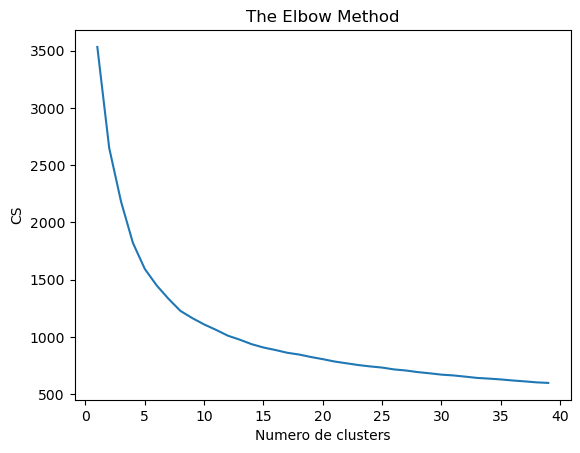

In [30]:
plt.plot(range(1, intentos), cs)
plt.title('The Elbow Method')
plt.xlabel('Numero de clusters')
plt.ylabel('CS')
plt.show()

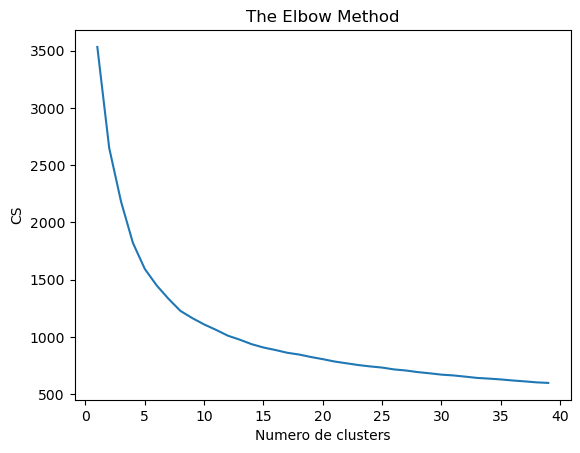

In [31]:
plt.plot(range(1, intentos), cs)
plt.title('The Elbow Method')
plt.xlabel('Numero de clusters')
plt.ylabel('CS')
plt.show()

In [32]:
kmeans = KMeans(n_clusters=7, random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

cluster_centers = kmeans.cluster_centers_

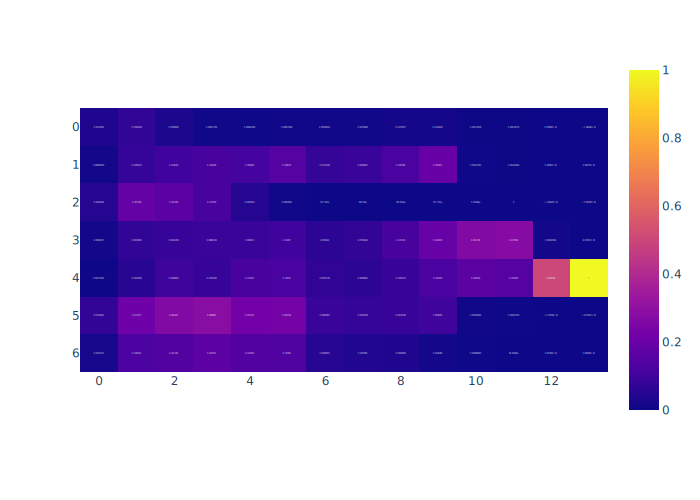

In [33]:
fig = px.imshow(cluster_centers, text_auto=True)
# fig.show()

fig.show(renderer="svg")

In [34]:
#import pycaret

In [35]:
#from pycaret.clustering import *

In [36]:
#kmeans.predict([[0, 0], [12, 3]])